In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [3]:
##This wokrbook will be for the left end position
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')
le = df[df['Position'] == 'LE']

In [4]:
lecols = list(le.columns.values)

In [5]:
print(lecols)

['Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [7]:
#First we will remove the non-numeric variables
le1 = le[['Overall Rating','3Cone', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Bench', 'Block Shedding', 
          'Broad Jump', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves','Hit Power',
          'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Pass Block', 'Play Action', 'Play Recognition',
          'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Shuttle', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm',
          'Strength', 'Tackle', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power',
          'Throw on the Run', 'Toughness', 'Trucking']]

In [8]:
lecorr = le.corr()

In [9]:
lesigpos = lecorr[lecorr['Overall Rating'] >= 0.5]

In [10]:
lesigneg = lecorr[lecorr['Overall Rating'] <= -0.5]

In [11]:
lesigpos['Overall Rating']

Awareness           0.867670
Overall Rating      1.000000
Play Recognition    0.852424
Pursuit             0.524561
Name: Overall Rating, dtype: float64

In [12]:
lesigneg
#It looks like we don't have any significant negative variables

,Unnamed: 0,Acceleration,Agility,Awareness,Ball Carrier Vision,Block Shedding,Carrying,Catch In Traffic,Catching,Elusiveness,...,Toughness,Trucking,Zone Coverage,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd


In [13]:
lesig = le[['Awareness', 'Play Recognition', 'Pursuit']]

In [15]:
X= add_constant(lesig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#We will remove Awareness

const               257.162526
Awareness            14.294709
Play Recognition     14.240435
Pursuit               1.146338
dtype: float64

In [16]:
lesig1 = le[['Play Recognition', 'Pursuit']]

In [18]:
X= add_constant(lesig1)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Now that all of our vif scores are below 5, we can move on to statistical testing

const               257.015951
Play Recognition      1.140784
Pursuit               1.140784
dtype: float64

In [21]:
LE = sm.OLS(le['Overall Rating'], lesig1).fit()
print(LE.summary())
#All of our variables are significant and it looks like we have a normal distribution based on skewness

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.629e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          6.82e-196
Time:                        23:04:24   Log-Likelihood:                -430.96
No. Observations:                 156   AIC:                             865.9
Df Residuals:                     154   BIC:                             872.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Play Recognition     0.4811      0.025  

In [26]:
def model():
    pv=0.4811*le['Play Recognition'] + 0.4957*le['Pursuit']
    return pv

In [27]:
le['Predicted Value'] = model()
le['Residual'] = le['Predicted Value'] - le['Overall Rating']

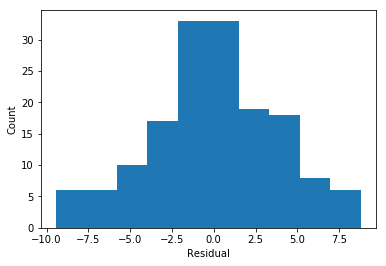

In [28]:
plt.hist(le['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

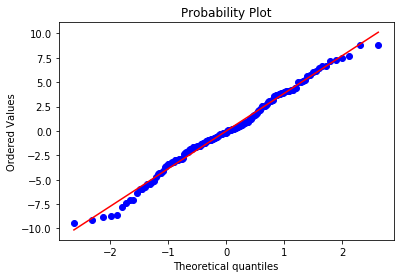

In [29]:
stats.probplot(le['Residual'], plot=plt)
plt.show()
#The residuals look very evenly distributed

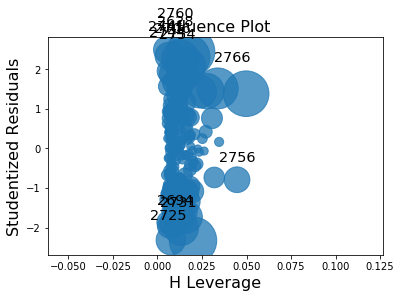

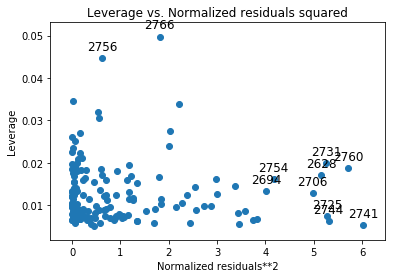

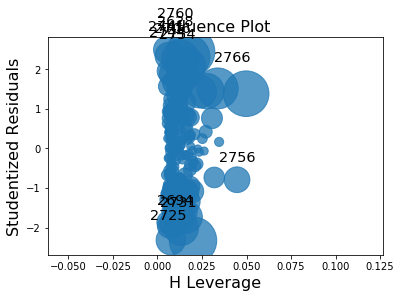

In [30]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(LE)
influence_plot(LE)
#THere are some points with higher residuals but they are not high enought that we have to remove them from the model

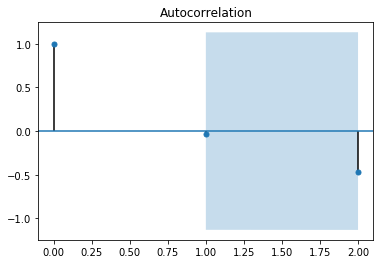

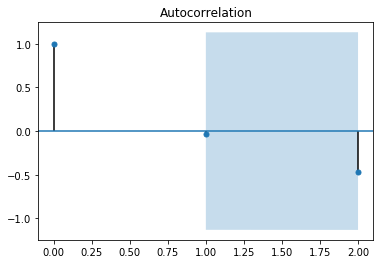

In [33]:
lecorr2 = le[['Overall Rating', 'Play Recognition', 'Pursuit']].corr()
plot_acf(lecorr2['Overall Rating'])
#there does not appear to be any autocorrelation looking at the plot below
#There is also a Durbin-Watson correlation of 1.724, which indicates no significant autocoreelation

In [34]:
#Finally, we check for homoskedasticity
het_breuschpagan(le['Residual'],lesig1)
#Due to the low p-values, we can reject the null that there is homoskedasticity in the data

(54.08803696236009,
 1.9170488262944315e-13,
 40.86643728532162,
 5.790869695696453e-15)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(lesig1, le['Overall Rating'], test_size=0.3, random_state=42)

In [36]:
reg= LinearRegression()

In [37]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
y_pred = reg.predict(X_test)

In [39]:
##Let's see how how much variation is currently explained by our model
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7575035655797006
Root Mean Squared Error: 3.7143343570283913


In [41]:
lecv = cross_val_score(reg, lesig1, le['Overall Rating'], cv = 5)

In [42]:
lecv_mean = np.mean(lecv)

In [43]:
print(lecv, lecv_mean)
#This alogirthm was correct roughly 79% of the time and there weren't any tests where it did extremely badly.
#Let's run some more tests to make sure we can use linear regression but otherwise things are looking good

[0.74989524 0.88227973 0.84221824 0.71427878 0.59514213] 0.7567628221777996


In [45]:
ledesc = le[['Overall Rating', 'Play Recognition', 'Pursuit', 'Predicted Value', 'Residual']]
ledesc1 = ledesc.describe()
ledesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\ledesc1.csv')